In [1]:
# Importing the required libraries

import gym

import numpy as np

import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v1',map_name="4x4")

In [3]:
number_of_states = env.observation_space.n

number_of_actions = env.action_space.n

# checking the total number of states and action

print('Total number of States : {}'.format(number_of_states))

print('Total number of Actions : {}'.format(number_of_actions))

Total number of States : 16
Total number of Actions : 4


In [12]:
# Creation of Q table

Q_TABLE = np.zeros([number_of_states, number_of_actions])

# Looking at the initial values Q table

print(Q_TABLE)

print('shape of Q table : {}'.format(Q_TABLE.shape))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
shape of Q table : (16, 4)


In [18]:
# Setting the Hyper parameter Values for Q Learning

NUMBER_OF_EPISODES = 10000

MAX_STEPS = 200

LEARNING_RATE = 0.3

DISCOUNT_FACTOR = 0.99

EGREEDY = 1

MAX_EGREEDY = 1

MIN_EGREEDY = 0.001

EGREEDY_DECAY_RATE = 0.001

# 
gym.Env

RETURNS:
observation (object) – this will be an element of the environment’s observation_space. 
                This may, for instance, be a numpy array containing the positions and velocities of certain objects.

reward (float) – The amount of reward returned as a result of taking the action.

terminated (bool) – whether a terminal state (as defined under the MDP of the task) is reached. 
                In this case further step() calls could return undefined results.

truncated (bool) – whether a truncation condition outside the scope of the MDP is satisfied. 
                    Typically a timelimit, but could also be used to indicate agent physically going out of bounds. Can be used to end the episode prematurely before a terminal state is reached.

info (dictionary) – info contains auxiliary diagnostic information (helpful for debugging,
                learning, and logging). This might, for instance, contain: metrics that describe the agent’s'''

In [19]:
'''
Create a for loop to iterate for NUMBER_OF_EPISODES. 
    
Reset the environment and set the done flag equal to False 
and current_episode_rewards as zero.

Create another for loop to run a single episode for MAX_STEPS. 

Inside the for loop, choose the best action using the 
epsilon-greedy strategy. 

Perform the action and update the Q values using the equation shown in Figure 9.18. Collect 
the reward and assign new_state as the current state. 

If the episode is over, break out from the loop, else 
continue taking the steps. Decay the epsilon value to
be able to continue for the next episode:
'''
# Creating empty lists to store rewards of all episodes

rewards_all_episodes = []

# Creating empty lists to store egreedy_values of all episodes

egreedy_values = []
# Training Process
for episode in range(NUMBER_OF_EPISODES):
    state = env.reset()[0]  #This resets the environment, 
                     #so the environment will be at the starting state.
    done = False
    current_episode_rewards = 0
    for step in range(MAX_STEPS):
        random_for_egreedy = np.random.rand() # uniform distribution 0 to 1
        
        if random_for_egreedy > EGREEDY:
            action = np.argmax(Q_TABLE[state,:]) # use q table to look up max and exploit
           # print('q table',Q_TABLE[state,:] )
        else:
            action = env.action_space.sample() # random allowable action
        
        new_state, reward, done,_,info = env.step(action)            
        
        # Q(s,a) = (1-alpha)*Q(s,a) + alpha(r +gamma*maxQ(s',a')
        Q_TABLE[state, action] = (1 - LEARNING_RATE) \
                                * Q_TABLE[state, action] \
                                + LEARNING_RATE \
                                * (reward + DISCOUNT_FACTOR \
                                * np.max(Q_TABLE[new_state,:]))
        state = new_state
        current_episode_rewards += reward

        if done: 
            break
#     print(current_episode_rewards)

    egreedy_values.append(EGREEDY)
    EGREEDY = MIN_EGREEDY + (MAX_EGREEDY - MIN_EGREEDY) \
                            * np.exp(-EGREEDY_DECAY_RATE*episode) # a way to decay the the epsilon
    rewards_all_episodes.append(current_episode_rewards)



In [ ]:
rewards_all_episodes

In [20]:
def rewards_split(rewards_all_episodes , total_episodes , split):
    '''
    To split and calculate average reward or percentage of

    completed rewards per splits

    inputs:

    rewards_all_episodes - all the per episode rewards

    total_episodes - total of episodes

    split - number of splits on which we will check the reward

    returns:

    average reward of percentage of completed rewards per splits
    '''

    splitted = np.split(np.array(rewards_all_episodes),total_episodes/split)
    print('total episode',total_episodes)
    print('splitted' , len(splitted))
 
    avg_reward_per_splits = []
    for rewards in splitted:
        avg_reward_per_splits.append(np.sum(rewards)/split)
   
    return avg_reward_per_splits



In [21]:

avg_reward_per_splits = rewards_split(rewards_all_episodes , NUMBER_OF_EPISODES , 1000)

total episode 10000
splitted 10


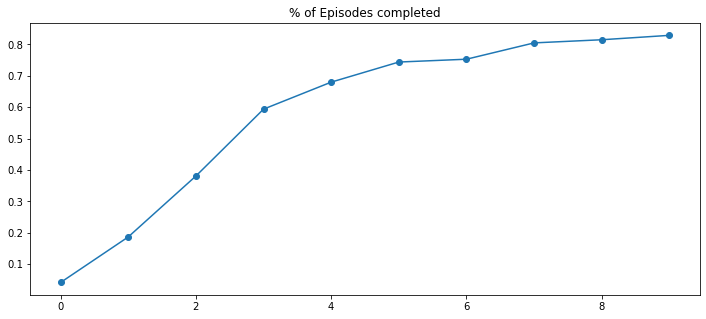

In [22]:
plt.figure(figsize=(12,5))

plt.title("% of Episodes completed")

plt.plot(np.arange(len(avg_reward_per_splits)), \
        avg_reward_per_splits, 'o-')

plt.show()

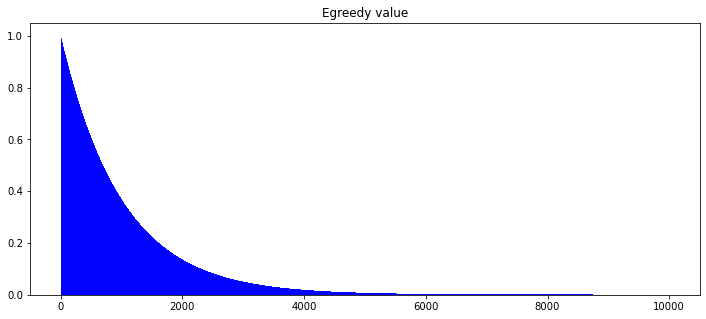

In [10]:
plt.figure(figsize=(12,5))

plt.title("Egreedy value")

plt.bar(np.arange(len(egreedy_values)), egreedy_values, \

        alpha=0.6, color='blue', width=5)

plt.show()

In [ ]:
print(Q_TABLE)